<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np


# Read World bank CSV

In [3]:
df = pd.read_csv('WorldBank.csv')

In [6]:
df.head(11)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050,10.124611,9.451370,10.529480,10.891125,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,17.080013,15.197912,16.863038,22.008132,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
5,India,IND,"International tourism, receipts for travel ite...",ST.INT.TVLR.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.770800e+10,1.797200e+10,1.839700e+10,1.970000e+10,2.101300e+10,2.242700e+10,2.736500e+10,2.856800e+10,NaN,NaN
6,India,IND,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.320000e+01,NaN,8.880000e+01,NaN,NaN,NaN,NaN
7,India,IND,"Population ages 80 and above, male (% of male ...",SP.POP.80UP.MA.5Y,0.251412,0.257585,0.255089,0.247544,0.238488,0.227453,...,6.461860e-01,6.765322e-01,6.990946e-01,7.134924e-01,7.194601e-01,7.601717e-01,7.925740e-01,8.154719e-01,0.828048,NaN
8,India,IND,"Population ages 55-59, male (% of male populat...",SP.POP.5559.MA.5Y,2.847921,2.856504,2.878934,2.906670,2.929115,2.940859,...,3.818976e+00,3.863840e+00,3.894884e+00,3.927760e+00,3.970981e+00,4.010443e+00,4.055267e+00,4.104097e+00,4.154306,NaN
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.497480,56.177532,55.807455,55.461664,55.248939,55.211351,...,6.442940e+01,6.480552e+01,6.520849e+01,6.559598e+01,6.594416e+01,6.627426e+01,6.653819e+01,6.676674e+01,67.003811,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [9]:
data = df[df['Indicator Name'] == 'Population ages 15-64 (% of total population)']

# Divide the data into input and output

In [12]:
data=data.iloc[:,4:-1]

In [15]:
data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,55.090901,55.155347,55.345073,55.570144,...,64.108211,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811


In [45]:
x = data.columns.values.reshape(-1,1)
x = np.array(x,dtype="int")

In [47]:
y = data.values.reshape(-1,1)
y

array([[56.49748004],
       [56.17753236],
       [55.80745463],
       [55.46166361],
       [55.24893881],
       [55.21135053],
       [55.09090078],
       [55.15534672],
       [55.34507283],
       [55.57014408],
       [55.78194745],
       [55.85676846],
       [55.95268174],
       [56.07247186],
       [56.23447551],
       [56.44405309],
       [56.49722595],
       [56.62068516],
       [56.78900152],
       [56.9691436 ],
       [57.1425581 ],
       [57.18105454],
       [57.22630775],
       [57.28875038],
       [57.39054366],
       [57.54142108],
       [57.55350984],
       [57.6545119 ],
       [57.81875323],
       [58.01501187],
       [58.22990246],
       [58.37403848],
       [58.5472698 ],
       [58.75605047],
       [59.012126  ],
       [59.31657719],
       [59.56507329],
       [59.8572303 ],
       [60.18600058],
       [60.53971518],
       [60.90862046],
       [61.18898716],
       [61.4993847 ],
       [61.83084479],
       [62.173897  ],
       [62

# Plot scatter plot of Population ages 15-64 (% of total population)

In [50]:
import matplotlib.pyplot as plt

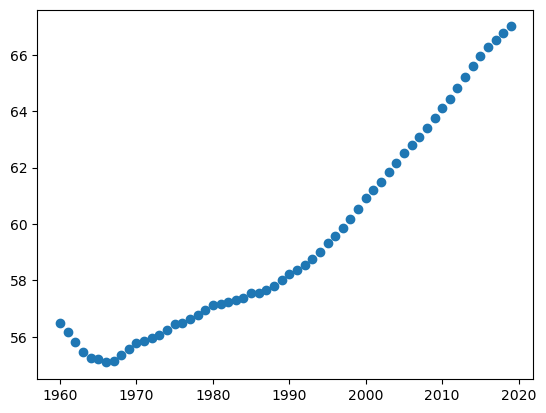

In [52]:
plt.scatter(x,y)

In [84]:
x

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [54]:
from sklearn.preprocessing import StandardScaler  

In [68]:
scaller1 = StandardScaler()
scaller2 = StandardScaler()

In [70]:
scalled_data= scaller1.fit_transform(x)

In [72]:
scalled_data

array([[-1.7034199 ],
       [-1.64567685],
       [-1.5879338 ],
       [-1.53019075],
       [-1.47244771],
       [-1.41470466],
       [-1.35696161],
       [-1.29921857],
       [-1.24147552],
       [-1.18373247],
       [-1.12598942],
       [-1.06824638],
       [-1.01050333],
       [-0.95276028],
       [-0.89501723],
       [-0.83727419],
       [-0.77953114],
       [-0.72178809],
       [-0.66404504],
       [-0.606302  ],
       [-0.54855895],
       [-0.4908159 ],
       [-0.43307286],
       [-0.37532981],
       [-0.31758676],
       [-0.25984371],
       [-0.20210067],
       [-0.14435762],
       [-0.08661457],
       [-0.02887152],
       [ 0.02887152],
       [ 0.08661457],
       [ 0.14435762],
       [ 0.20210067],
       [ 0.25984371],
       [ 0.31758676],
       [ 0.37532981],
       [ 0.43307286],
       [ 0.4908159 ],
       [ 0.54855895],
       [ 0.606302  ],
       [ 0.66404504],
       [ 0.72178809],
       [ 0.77953114],
       [ 0.83727419],
       [ 0

In [74]:
scaller_out = scaller2.fit_transform(y)

In [76]:
scaller_out

array([[-0.81106651],
       [-0.89953531],
       [-1.00186558],
       [-1.09748032],
       [-1.1563009 ],
       [-1.16669445],
       [-1.20000003],
       [-1.18218007],
       [-1.12971887],
       [-1.06748437],
       [-1.00891857],
       [-0.9882298 ],
       [-0.9617088 ],
       [-0.92858561],
       [-0.88378994],
       [-0.8258396 ],
       [-0.81113676],
       [-0.77699903],
       [-0.73045784],
       [-0.68064672],
       [-0.63269584],
       [-0.62205118],
       [-0.6095382 ],
       [-0.59227218],
       [-0.5641253 ],
       [-0.52240615],
       [-0.51906348],
       [-0.49113538],
       [-0.44572098],
       [-0.39145346],
       [-0.33203402],
       [-0.29217894],
       [-0.24427871],
       [-0.18654872],
       [-0.11574122],
       [-0.03155736],
       [ 0.03715435],
       [ 0.11793874],
       [ 0.20884708],
       [ 0.30665278],
       [ 0.40865886],
       [ 0.48618311],
       [ 0.5720112 ],
       [ 0.6636633 ],
       [ 0.75852074],
       [ 0

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [78]:
from sklearn.svm import SVR 

In [80]:
svr = SVR()

In [89]:
svr.fit(scalled_data,scaller_out.ravel())

SVR()

# Splitting the dataset into the Training set and Test set

# Fitting SVR on 3 Different Kernel on dataset

In [115]:
scaller2.inverse_transform(svr.predict(scaller_out).reshape(-1,1))

array([[56.16595786],
       [55.95507865],
       [55.74699973],
       [55.59871679],
       [55.53424249],
       [55.52517718],
       [55.50106649],
       [55.51302015],
       [55.56065888],
       [55.63976532],
       [55.73439804],
       [55.77205191],
       [55.82327308],
       [55.89156898],
       [55.99079425],
       [56.12914809],
       [56.16578147],
       [56.25286953],
       [56.37548746],
       [56.51056405],
       [56.64325145],
       [56.67296177],
       [56.70797815],
       [56.75643275],
       [56.83568174],
       [56.95348568],
       [56.96293269],
       [57.04186464],
       [57.17008275],
       [57.32282031],
       [57.48933895],
       [57.60069731],
       [57.73442661],
       [57.89600223],
       [58.09614595],
       [58.33988968],
       [58.54644379],
       [58.80193134],
       [59.11113716],
       [59.47632076],
       [59.90021832],
       [60.25524067],
       [60.68317164],
       [61.18037397],
       [61.73544019],
       [62

SVR()

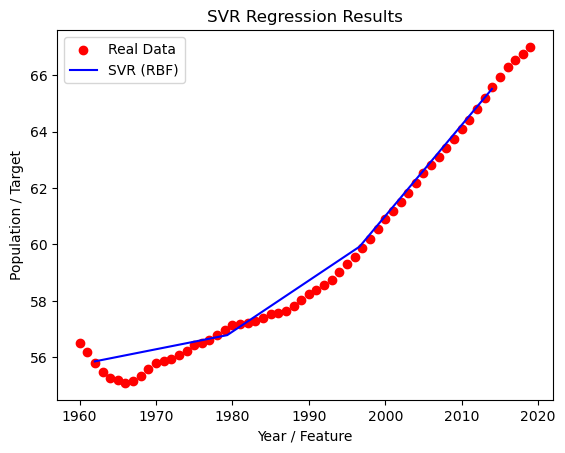

# Predict the x_test using 3 Kernel

In [ ]:
model_rbf.score(x_train,y_train)

0.9947138713539011

In [ ]:
model_rbf.score(x_test,y_test)

0.9880623181593732

array([57.55350984, 59.31657719, 67.00381119, 57.81875323, 55.85676846,
       55.80745463, 59.012126, 66.7667425, 60.90862046, 57.22630775,
       55.24893881, 55.78194745, 58.22990246, 61.18898716, 58.75605047,
       61.83084479, 63.74196691, 55.15534672], dtype=object)

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

# Visualising the  results

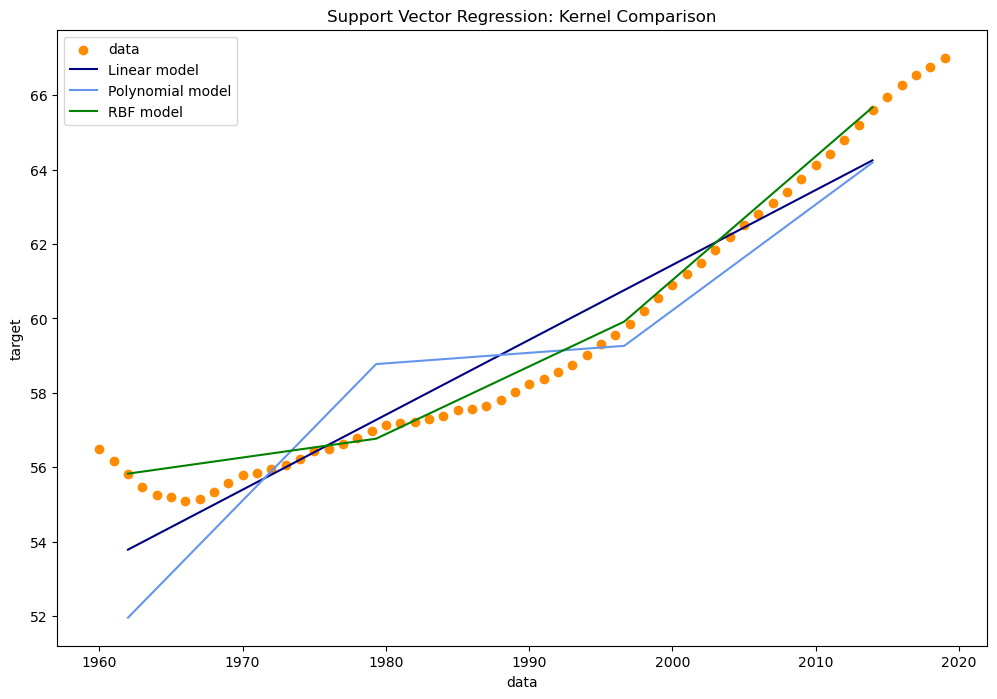

### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.

The predicted value for input 2025 is: 66.47
